# Medidas Descritivas e Análises de Portfólios - Aplicações em AEDI

**Tarefa 2 (Trabalho Final)**

**Aluno: Lucas Fonseca Gonçalez**


---



Suponhamos que uma pessoa leu uma matéria publicada no website Infomoney em 2010 a respeito de uma carteira recomendada por uma 
corretora e tenha decidido seguir a risca as indicações:

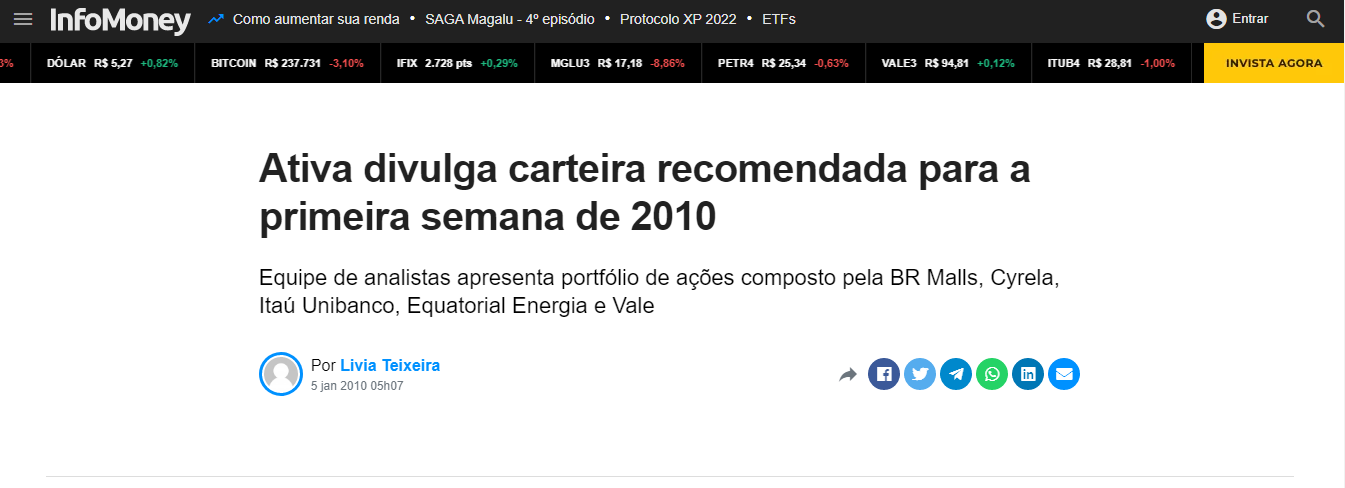

Suponha que esse investidor, após adquirir o mesmo peso de cada uma das ações descritas no subtítulo acima, não tenha feito mais nenhuma movimentação em sua carteira desde então. Como ficaria o desempenho de sua carteira atualmente?

---



In [1]:
!pip install yfinance --upgrade --no-cache-dir
import yfinance as yf

In [2]:
#Importando Bibliotecas
import pandas as pd
pd.set_option('display.min_rows', 50)
pd.set_option('display.max_rows', 200)
from pandas_datareader import data as pdr
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
import plotly.graph_objects as go
from ipywidgets import interact
import math
import plotly.express as px
from scipy import stats

In [3]:
def busca_carteira_teorica(indice):
  url = 'http://bvmf.bmfbovespa.com.br/indices/ResumoCarteiraTeorica.aspx?Indice={}&idioma=pt-br'.format(indice.upper())
  return pd.read_html(url, decimal=',', thousands='.', index_col='Código')[0][:-1]

In [4]:
ibov = busca_carteira_teorica('ibov')

In [5]:
ibov.sort_values('Part. (%)', ascending=False)

,Ação,Tipo,Qtde. Teórica,Part. (%)
Código,,,,
VALE3,VALE,ON NM,2837320141,13.770
ITUB4,ITAUUNIBANCO,PN EDJ N1,4757466114,5.802
B3SA3,B3,ON NM,1930877944,5.167
PETR4,PETROBRAS,PN N2,4566457037,4.946
BBDC4,BRADESCO,PN EJ N1,4261649634,4.663
PETR3,PETROBRAS,ON N2,3307982840,3.585
MGLU3,MAGAZ LUIZA,ON NM,2668955512,3.226
ABEV3,AMBEV S/A,ON,4355174839,2.953
WEGE3,WEG,ON ED NM,741148001,2.847


Percebe-se que VALE3, ITUB4 e B3SA3 são as três maiores posições do índice Bovespa atualmente.

Além disso, a título de curiosidade, deseja-se saber qual a correlação do índice bovespa com o dólar:

In [6]:
tickers = "^BVSP USDBRL=X"
carteira = yf.download(tickers, start="2007-01-01")["Close"]
carteira = carteira.dropna()
carteira.columns = ["DOLAR", "IBOV"]
carteira

[*********************100%***********************]  2 of 2 completed


,DOLAR,IBOV
Date,,
2007-01-02,2.1310,45383.00000
2007-01-03,2.1345,44445.00000
2007-01-04,2.1390,44020.00000
2007-01-05,2.1470,42245.00000
2007-01-08,2.1465,42830.00000
2007-01-09,2.1490,42007.00000
2007-01-10,2.1496,42336.00000
2007-01-11,2.1415,42670.00000
2007-01-12,2.1370,43095.00000


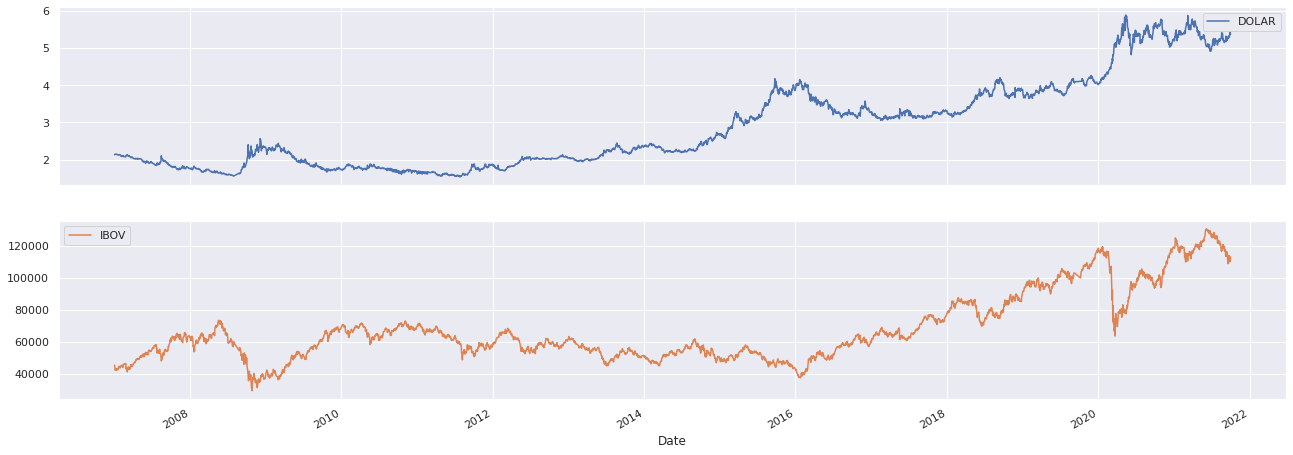

In [7]:
sns.set()
carteira.plot(subplots=True, figsize=(22,8));

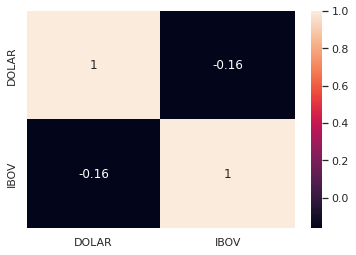

In [8]:
retornos = carteira.pct_change()[1:]
sns.heatmap(retornos.corr(), annot=True);

Pelo gráfico acima, é possível inferir que há correlação entre o Dolar e o Indice Bovespa, contudo, essa correlação tende a ser inversamente proporcional. Um dos motivos para isso é que quando o mercado interno é abalado, os investidores tentam se proteger em moeda estrangeira. Contudo, correlação não implica em causalidade. Ou seja, o dólar não cai porque o Ibovespa subiu, nem vice-versa. São apenas tendências dos dois ativos se comportarem de maneira oposta.

Um dos motivos de se ter uma carteira diversificada é obter uma baixa correlação entre ativos de uma mesma carteira de modo que quando o preço de determinado ativo cai, o de outro ativo tende a subir. Isso pode minimizar os grandes lucros, é verdade. Contudo, a principal vantagem dessa estratégia é minimizar as perdas, algo que deveria ser o primeiro pensamento de todo investidor.

In [9]:
tickers = "BRML3.SA CYRE3.SA ITUB4.SA EQTL3.SA VALE3.SA"

carteira = yf.download(tickers, period="11y")["Adj Close"]

ibov = yf.download("^BVSP", period="11y")["Adj Close"]

[*********************100%***********************]  5 of 5 completed
[*********************100%***********************]  1 of 1 completed


In [10]:
carteira.dropna(inplace=True)


In [11]:
ibov.dropna(inplace=True)

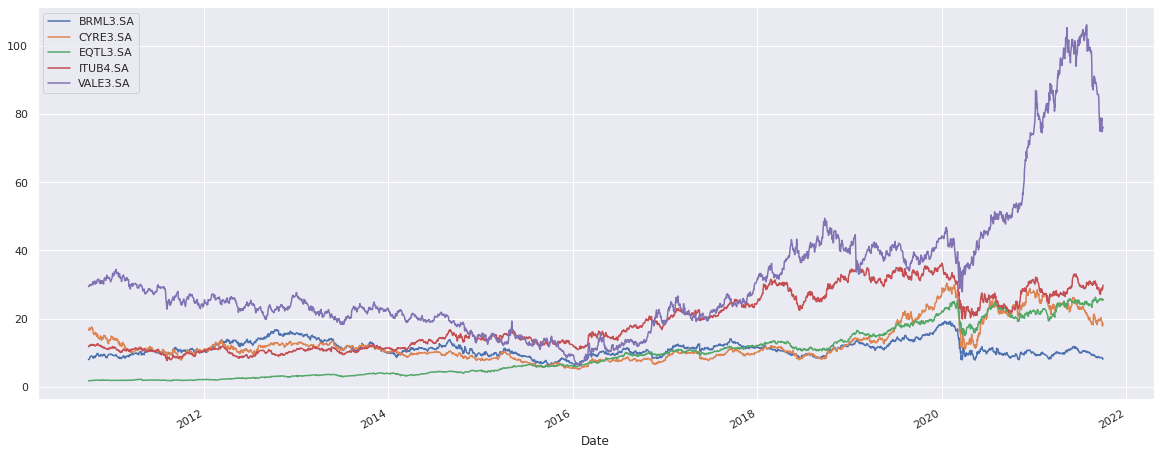

In [12]:
sns.set()
carteira.plot(figsize=(20,8));



Podemos normalizar a carteira, para partir do mesmo ponto:



In [13]:
carteira_normalizada = (carteira / carteira.iloc[0])*10000
carteira_normalizada.dropna(inplace=True)

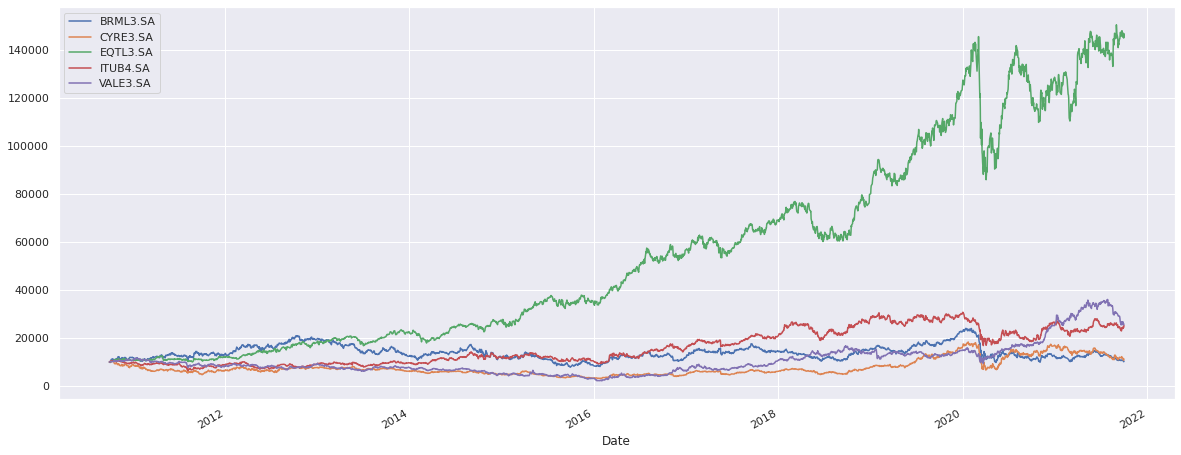

In [14]:
carteira_normalizada.plot(figsize=(20,8));

In [15]:
carteira_normalizada["consolidada"] = carteira_normalizada.sum(axis=1)

In [16]:
carteira_normalizada

,BRML3.SA,CYRE3.SA,EQTL3.SA,ITUB4.SA,VALE3.SA,consolidada
Date,,,,,,
2010-10-01,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,50000.000000
2010-10-04,10035.090558,10254.308601,9794.205428,10012.259384,10007.575045,50103.439016
2010-10-05,10315.789964,10438.883099,10009.353678,10262.254678,10134.470005,51160.751423
2010-10-06,10526.316606,10336.343374,10102.903428,10171.572399,10164.772128,51301.907935
2010-10-07,10694.738636,10049.221094,10233.863796,10191.178527,10128.788073,51297.790126
2010-10-08,11052.633809,10090.239056,10233.863796,10414.220142,10094.693892,51885.650694
2010-10-11,11192.982915,10225.593611,10318.055090,10335.785129,10151.517095,52223.933840
2010-10-13,11354.386714,10541.428579,10289.993373,10455.889929,10142.046345,52783.744939
2010-10-14,11228.072876,10615.256767,10467.727592,10379.910025,10179.923514,52870.890773


Podemos que normalizar também o índice bovespa:

In [17]:
ibov_normalizado = (ibov / ibov.iloc[0])*50000
ibov_normalizado

Date
2010-10-01    50000.000000
2010-10-04    50111.065229
2010-10-05    50750.402255
2010-10-06    50222.130459
2010-10-07    49778.581498
2010-10-08    50412.934827
2010-10-11    50510.472882
2010-10-13    51029.489242
2010-10-14    51041.592505
2010-10-15    51139.842515
2010-10-18    51072.918595
2010-10-19    49740.135841
2010-10-20    50125.304361
2010-10-21    49589.201042
2010-10-22    49502.342337
2010-10-25    49537.940167
2010-10-26    50363.809822
2010-10-27    50242.065244
2010-10-28    50064.788051
2010-10-29    50316.108730
2010-11-01    50948.326190
2010-11-03    51193.239260
2010-11-04    51969.983910
2010-11-05    51693.032793
2010-11-08    51728.630623
                  ...     
2021-08-27    85917.498469
2021-08-30    85249.683179
2021-08-31    84566.916801
2021-09-01    85004.770109
2021-09-02    83068.960116
2021-09-03    83251.221006
2021-09-06    83917.612382
2021-09-08    80745.133777
2021-09-09    82132.025232
2021-09-10    81366.671888
2021-09-13    82874.595

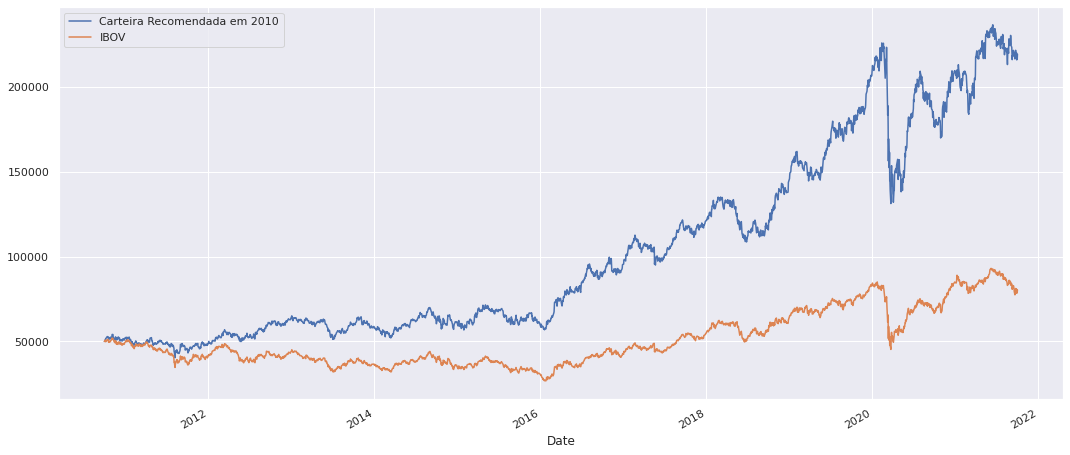

In [18]:
carteira_normalizada["consolidada"].plot(figsize=(18,8), label="Carteira Recomendada em 2010")
ibov_normalizado.plot(label="IBOV")
plt.legend();

Pelo gráfico é possível notar o retorno da carteira sugerida bem acima do Ibovespa.

In [19]:
carteira_normalizada.describe()

,BRML3.SA,CYRE3.SA,EQTL3.SA,ITUB4.SA,VALE3.SA,consolidada
count,2706.000000,2706.000000,2706.000000,2706.000000,2706.000000,2706.000000
mean,13844.378845,7638.411875,55278.017477,16116.067875,10653.439827,103530.315899
std,2806.042019,3368.015187,41215.899680,7060.528831,6767.250190,55853.204715
min,7853.796083,3093.191067,9794.205428,6467.168724,2124.285191,40400.584511
25%,11962.840251,5525.087346,19563.437688,9566.668953,6813.354606,59254.864906
50%,13446.069561,6536.129404,43099.036667,13250.226425,8447.253146,77882.395726
75%,15198.341401,8216.227975,83506.437231,22536.442685,13050.697083,141263.898106
max,24050.812899,18357.375481,150608.942409,30749.853392,36094.710608,236802.637865


Outra análise interessante, seria acrescentar o dólar normalizado no gráfico acima para comparar com a carteira e o Ibov:

In [20]:
tckrs = "USDBRL=X"
dolar = yf.download(tckrs, start="2010-09-10")["Close"]
dolar

[*********************100%***********************]  1 of 1 completed


Date
2010-09-10    1.7232
2010-09-13    1.6680
2010-09-14    1.7165
2010-09-15    1.7015
2010-09-16    1.7212
2010-09-17    1.7175
2010-09-20    1.6655
2010-09-21    1.7265
2010-09-22    1.7245
2010-09-23    1.6743
2010-09-24    1.7177
2010-09-27    1.6644
2010-09-28    1.7090
2010-09-29    1.7090
2010-09-30    1.7035
2010-10-01    1.6961
2010-10-04    1.6335
2010-10-05    1.6975
2010-10-06    1.6690
2010-10-07    1.6840
2010-10-08    1.6778
2010-10-11    1.6258
2010-10-12    1.6613
2010-10-13    1.6700
2010-10-14    1.6525
               ...  
2021-08-30    5.2028
2021-08-31    5.1829
2021-09-01    5.1493
2021-09-02    5.1846
2021-09-03    5.1818
2021-09-06    5.1898
2021-09-07    5.1693
2021-09-08    5.1696
2021-09-09    5.3206
2021-09-10    5.1965
2021-09-13    5.2470
2021-09-14    5.2132
2021-09-15    5.2389
2021-09-16    5.2217
2021-09-17    5.2568
2021-09-20    5.2897
2021-09-21    5.3232
2021-09-22    5.2689
2021-09-23    5.2877
2021-09-24    5.3019
2021-09-27    5.3370
2021-09-

In [21]:
#Precisamos normalizar o Dolar
dolar_normalizado = (dolar / dolar.iloc[0])*50000
dolar_normalizado

Date
2010-09-10     50000.000000
2010-09-13     48398.329216
2010-09-14     49805.596569
2010-09-15     49370.360206
2010-09-16     49941.969177
2010-09-17     49834.610251
2010-09-20     48325.791552
2010-09-21     50095.754144
2010-09-22     50037.719862
2010-09-23     48581.127866
2010-09-24     49840.414371
2010-09-27     48293.872350
2010-09-28     49587.976658
2010-09-29     49587.976658
2010-09-30     49428.391029
2010-10-01     49213.673179
2010-10-04     47397.284543
2010-10-05     49254.295101
2010-10-06     48427.346357
2010-10-07     48862.582720
2010-10-08     48682.686130
2010-10-11     47173.863971
2010-10-12     48203.922326
2010-10-13     48456.360039
2010-10-14     47948.586012
                  ...      
2021-08-30    150963.321351
2021-08-31    150385.911720
2021-09-01    149410.985587
2021-09-02    150435.236363
2021-09-03    150353.992519
2021-09-06    150586.115812
2021-09-07    149991.300738
2021-09-08    150000.003459
2021-09-09    154381.387688
2021-09-10    1

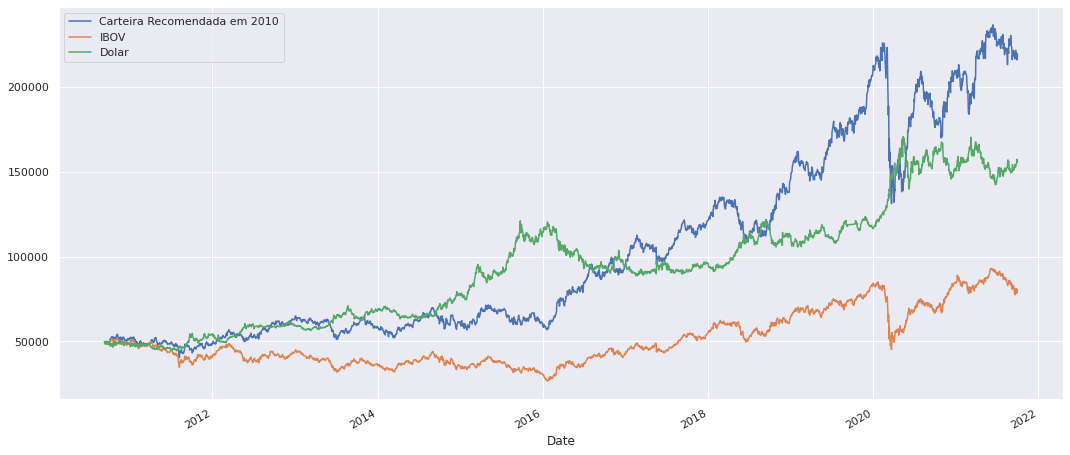

In [22]:
carteira_normalizada["consolidada"].plot(figsize=(18,8), label="Carteira Recomendada em 2010")
ibov_normalizado.plot(label="IBOV")
dolar_normalizado.plot(label="Dolar")
plt.legend();

In [23]:
taxas_retorno = (carteira_normalizada / carteira_normalizada.shift(1))-1
taxas_retorno

,BRML3.SA,CYRE3.SA,EQTL3.SA,ITUB4.SA,VALE3.SA,consolidada
Date,,,,,,
2010-10-01,NaN,NaN,NaN,NaN,NaN,NaN
2010-10-04,0.003509,0.025431,-0.020579,0.001226,0.000758,0.002069
2010-10-05,0.027972,0.018000,0.021967,0.024969,0.012680,0.021103
2010-10-06,0.020408,-0.009823,0.009346,-0.008836,0.002990,0.002759
2010-10-07,0.016000,-0.027778,0.012963,0.001928,-0.003540,-0.000080
2010-10-08,0.033465,0.004082,0.000000,0.021886,-0.003366,0.011460
2010-10-11,0.012698,0.013414,0.008227,-0.007532,0.005629,0.006520
2010-10-13,0.014420,0.030887,-0.002720,0.011620,-0.000933,0.010719
2010-10-14,-0.011125,0.007004,0.017273,-0.007267,0.003735,0.001651


In [24]:
taxas_retorno.mean()*100

BRML3.SA       0.031731
CYRE3.SA       0.041906
EQTL3.SA       0.114600
ITUB4.SA       0.054762
VALE3.SA       0.071234
consolidada    0.066445
dtype: float64

In [25]:
taxas_retorno.std()*100

BRML3.SA       2.458262
CYRE3.SA       2.727183
EQTL3.SA       1.744661
ITUB4.SA       2.027069
VALE3.SA       2.687788
consolidada    1.528901
dtype: float64

In [26]:
#para anualizar
taxas_retorno.std()*252

BRML3.SA       6.194820
CYRE3.SA       6.872502
EQTL3.SA       4.396547
ITUB4.SA       5.108213
VALE3.SA       6.773225
consolidada    3.852831
dtype: float64

In [27]:
(taxas_retorno.std()*math.sqrt(252))*100

BRML3.SA       39.023696
CYRE3.SA       43.292696
EQTL3.SA       27.695641
ITUB4.SA       32.178715
VALE3.SA       42.667305
consolidada    24.270556
dtype: float64

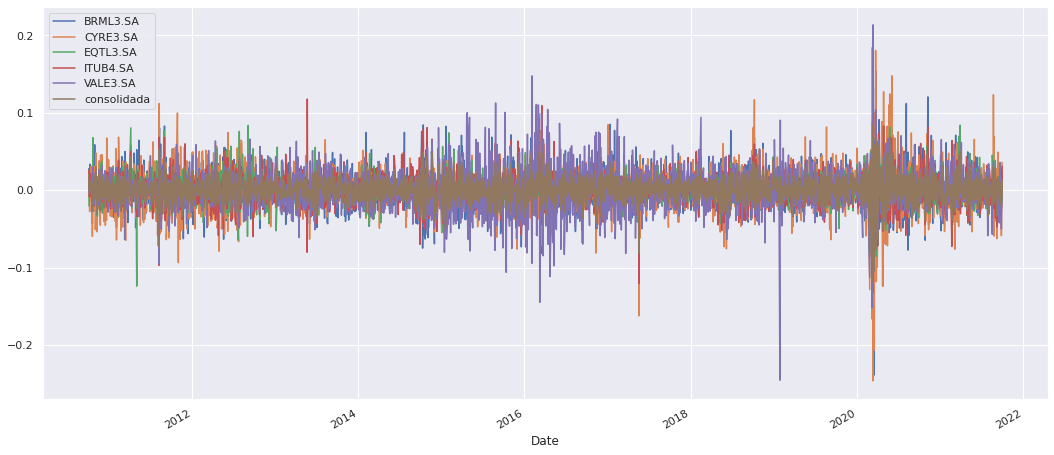

In [28]:
taxas_retorno.plot(figsize=(18,8))


Conclui-se que a carteira recomendada em 2010 teria um desempenho melhor do que o Ibovespa. Esse fato reforça a metodologia do Buy and Hold, estratégia de investimento de compra de ações a longo prazo e que o investidor ganha tanto no crescimento da empresa, notada através da valorização das ações, quanto no reinvestimento dos dividendos. Essa estratégia evita que o investidor precise acertar o timing correto de vender determianda ação. O fato de manter a ação em carteira garante toda a valorização no longo prazo. Corrobora-se com o pensamento do renomado economista Jeremy Siegel, que demostra em seus estudos que as ações tendem a se valorizar num horizonte de longo prazo. Defensores da estratégia acreditam que não se deve vender um título exceto em casos excepcionais. O estudo comprovou que no horizonte de 10 anos, apenas o fato de manter as ações na carteira trouxe resultados satisfatórios. O fator tempo possui importância maior do que a lucratividade de determinado ativo no curto prazo, pois o fator tempo tem crescimento exponencial.

# **ANOVA**

A análise de variância (ANOVA) pode determinar se as médias de três ou mais grupos de amostras independentes e de distribuição normal são diferentes.

In [29]:
!pip install pingouin
import pingouin as pg

     |████████████████████████████████| 206 kB 7.1 MB/s 
     |████████████████████████████████| 28.5 MB 47 kB/s 
     |████████████████████████████████| 9.5 MB 36.6 MB/s 
  Created wheel for pingouin: filename=pingouin-0.4.0-py3-none-any.whl size=206904 sha256=5f2905d226b9a80393cc93dcc895164b9a6f983b4bab6d780be99898346b97d9
  Stored in directory: /root/.cache/pip/wheels/8a/9d/c4/11677c2c4d5c0df9d1d4aa61528d868bb96e13b898e3f51c95
  Created wheel for littleutils: filename=littleutils-0.2.2-py3-none-any.whl size=7048 sha256=af21e6d684c4a013baeed1659a00f8a72127a6de7656637608e0ad0f577fad73
  Stored in directory: /root/.cache/pip/wheels/d6/64/cd/32819b511a488e4993f2fab909a95330289c3f4e0f6ef4676d
Successfully built pingouin littleutils
  Attempting uninstall: scipy
    Found existing installation: scipy 1.4.1
    Uninstalling scipy-1.4.1:
      Successfully uninstalled scipy-1.4.1
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmo

In [30]:
!pip install yfinance --upgrade --no-cache-dir
import yfinance as yf

In [31]:
tickers = "BRML3.SA CYRE3.SA ITUB4.SA EQTL3.SA VALE3.SA"
carteira = yf.download(tickers, period="11y")["Adj Close"]
carteira

[*********************100%***********************]  5 of 5 completed


,BRML3.SA,CYRE3.SA,EQTL3.SA,ITUB4.SA,VALE3.SA
Date,,,,,
2010-10-01,7.991414,16.571321,1.746909,11.804844,29.439722
2010-10-04,8.019454,16.992744,1.710958,11.819315,29.462021
2010-10-05,8.243774,17.298613,1.748542,12.114430,29.835598
2010-10-06,8.412017,17.128683,1.764885,12.007384,29.924812
2010-10-07,8.546608,16.652885,1.787762,12.030525,29.818863
2010-10-08,8.832615,16.720860,1.787762,12.293814,29.718510
2010-10-11,8.944776,16.945162,1.802469,12.201235,29.885782
2010-10-13,9.073762,17.468540,1.797567,12.343011,29.857899
2010-10-14,8.972816,17.590885,1.828616,12.253313,29.969408


In [32]:
import pandas as pd
pd.set_option('display.min_rows', 50)
pd.set_option('display.max_rows', 200)
from pandas_datareader import data as pdr

In [33]:
from google.colab import files
uploaded = files.upload()

Saving ConsolidadoAnova.csv.csv to ConsolidadoAnova.csv.csv


In [34]:
df = pd.read_csv('ConsolidadoAnova.csv.csv')

df.shape

(50, 6)

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DATA    50 non-null     object 
 1   BRML3   50 non-null     float64
 2   EQTL3   50 non-null     float64
 3   VALE3   50 non-null     float64
 4   CYRE3   50 non-null     float64
 5   ITUB4   50 non-null     float64
dtypes: float64(5), object(1)
memory usage: 2.5+ KB


As informações vistas acima nos fornece os dados constantes na planilha que foi realizada a análise da ANOVA. Optou-se por utilizar o Excel para obter os dados da ANOVA, devido a sua facilidade. Devido ao elevado tamanho dos dados no site da B3, foi utilizado os últimos 50 dias com o preço de fechamento de mercado para a análise.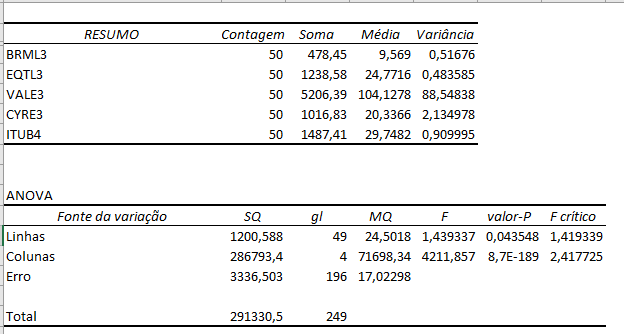

**Interpretação:**

O valor de F (Fisher), é o resultado da divisão entre o quadrado médio do tratamento e o quadrado médio do resíduo. O valor de F ser maior do que o F Crítico, como na tabela acima, indica significância. Esse fato pode ser comprovado pelo valor-P, que é menor do que 0,05.

Foi utilizado também o software PAST (Paleontological Statistics Software Package For Education And Data Analysis) para realizar algumas análises estatísticas. Os resultados obtidos estão demonstrados na imagem a seguir: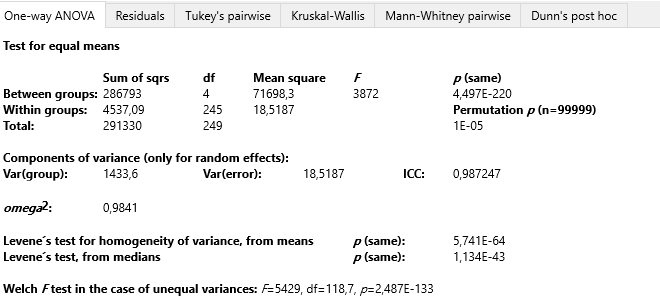

O **teste de Levene** permite-nos averiguar da homogeneidade das variâncias. Pela análise deste, conclui-se que as variâncias são diferentes entre os grupos, uma vez que a significância associada ao teste é inferior a 0,05.

Também foi realizado o **Teste de Tukey** pelo software Past: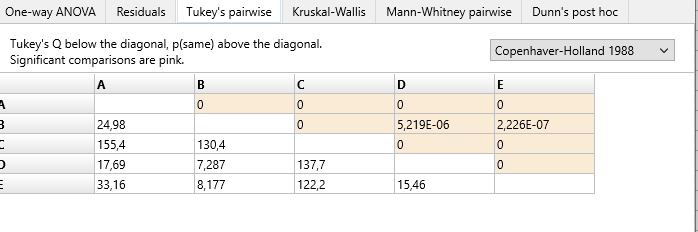

O teste de Tukey compara os ativos entre si, onde A corresponde a BRML3, B a EQTL3, C a VALE3, D a CYRE3 e E a ITUB4. Contudo, neste caso essa análise não é a mais adequada pois o teste de Levene mostrou que não foi assumido a homogeneidade das variâncias. Em casos como esses, é possível utilizar outros testes, como por exemplo o teste de **Kruskal-Wallis**: 
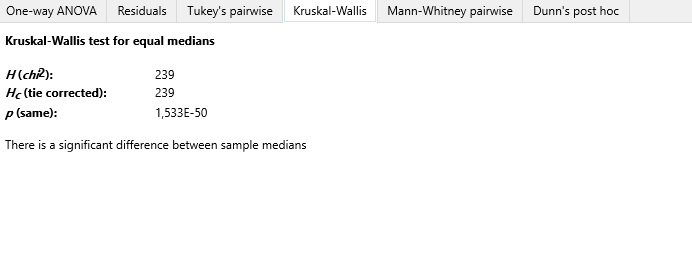

O teste de Kruskal-Wallis,  método não-paramétrico alternativo à ANOVA, aprova a hipótese de que há diferenças significativas entre as amostras.

In [44]:
import numpy as np
import matplotlib.pyplot as plt
# importar os pacotes necessários
from sklearn.datasets import load_diabetes
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


In [45]:
carteira

,BRML3.SA,CYRE3.SA,EQTL3.SA,ITUB4.SA,VALE3.SA
Date,,,,,
2010-10-01,7.991414,16.571321,1.746909,11.804844,29.439722
2010-10-04,8.019454,16.992744,1.710958,11.819315,29.462021
2010-10-05,8.243774,17.298613,1.748542,12.114430,29.835598
2010-10-06,8.412017,17.128683,1.764885,12.007384,29.924812
2010-10-07,8.546608,16.652885,1.787762,12.030525,29.818863
2010-10-08,8.832615,16.720860,1.787762,12.293814,29.718510
2010-10-11,8.944776,16.945162,1.802469,12.201235,29.885782
2010-10-13,9.073762,17.468540,1.797567,12.343011,29.857899
2010-10-14,8.972816,17.590885,1.828616,12.253313,29.969408


In [50]:
coluna = carteira['BRML3.SA']
coluna = carteira.iloc['BRML3.SA']

TypeError: ignored

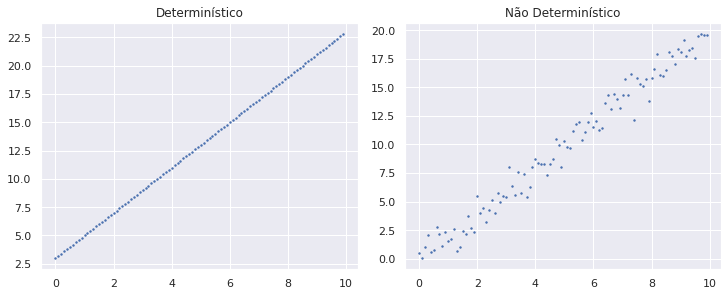

In [40]:
# exemplo de plots determinísticos
np.random.seed(42)
det_x = np.arange(0,10,0.1)
det_y = 2 * det_x + 3

# exemplo de plots não determinísticos
non_det_x = np.arange(0, 10, 0.1)
non_det_y = 2 * non_det_x + np.random.normal(size=100)

# plotar determinísticos vs. não determinísticos
fig, axs = plt.subplots(1, 2, figsize=(10,4), constrained_layout=True)

axs[0].scatter(det_x, det_y, s=2)
axs[0].set_title("Determinístico")

axs[1].scatter(non_det_x, non_det_y, s=2)
axs[1].set_title("Não Determinístico")

plt.show()

In [51]:
import numpy as np
import pandas as pd
from pandas_datareader import data
import matplotlib.pyplot as plt 
plt.rcParams['figure.figsize'] = (18,8)

In [60]:
BRML = yf.download("BRML3.SA", period="11y")["Adj Close"]

[*********************100%***********************]  1 of 1 completed


In [67]:
BRML=BRML.shift(-1)
BRML.head()


Date
2010-10-01    8.412016
2010-10-04    8.546607
2010-10-05    8.832615
2010-10-06    8.944777
2010-10-07    9.073761
Name: Adj Close, dtype: float64

**Aluno: Lucas Fonseca Gonçalez**